### Regression
Regression analysis is one of the most important fields in statistics and machine learning.

Regression searches for relationships among **variables**.

Generally, in regression analysis, there is some phenomenon and a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, the aim is to establish a relation among them (to find a **function** that **maps some features or variables to others** sufficiently well).

The **dependent features** are called the **dependent variables**, **outputs**, or **responses**.

The **independent features** are called the **independent variables**, **inputs**, or **predictors**.



In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns; sns.set()
import numpy as np

### Linear regression
Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. Such models are popular because they can be fit very quickly, and are very interpretable.
It uses historical data to predict an output variable.



#### Problem Formulation
When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 

#### 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. 

This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.

Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. They define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, that should capture the dependencies between the inputs and output sufficiently well.

The estimated or predicted response, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the residuals. 

Regression is about determining the best predicted weights, that is the weights corresponding to the smallest residuals.

To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛 (the method of ordinary least squares): 

#### SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))².



### Implementing Linear Regression in Python

#### Simple Linear Regression

The most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form

**y = ax + b**

where a is commonly known as the slope, and b is commonly known as the intercept.

The following data is scattered about a line with a slope of 3 and an intercept of -7:

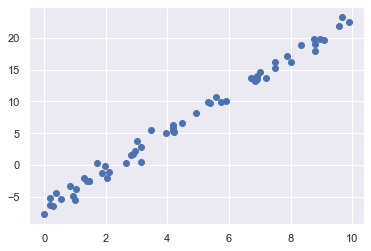

In [20]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(60)
y = 3 * x - 7 + rng.randn(60)
plt.scatter(x, y);

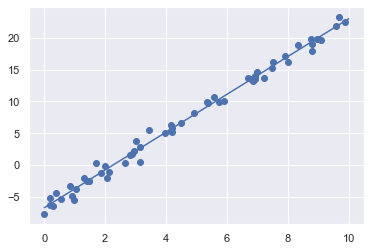

In [13]:
# Scikit-Learn's LinearRegression estimator can be used to fit this data and construct the best-fit line:

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [22]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.9679104835476466
Model intercept: -6.694471244622307


#### Multiple Linear Regression

In [23]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


#### Polynomial Regression

In [31]:
# the transformer convertes one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

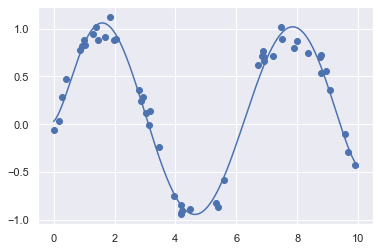

In [27]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Underfitting and Overfitting

One very important question that might arise when you’re implementing polynomial regression is related to the choice of the optimal degree of the polynomial regression function.

There is no straightforward rule and two problems that might follow the choice of the degree: **underfitting** and **overfitting**.

Underfitting occurs when a model can’t accurately capture the dependencies among data, usually as a consequence of its own simplicity. It often yields a low 𝑅² with known data and bad generalization capabilities when applied with new data.

Overfitting happens when a model learns both dependencies among data and random fluctuations. In other words, a model learns the existing data too well. Complex models, which have many features or terms, are often prone to overfitting. When applied to known data, such models usually yield high 𝑅². However, they often don’t generalize well and have significantly lower 𝑅² when used with new data.